1. Implement Bresenham’s algorithm as shown.

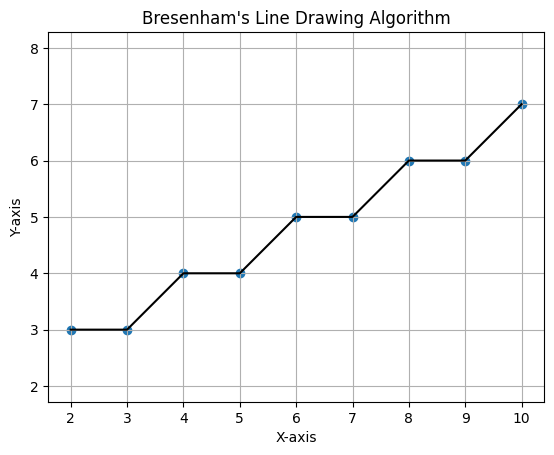

In [10]:
import matplotlib.pyplot as plt

def bresenham(x1, y1, x2, y2):
    x_points = []
    y_points = []

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1

    err = dx - dy

    while True:
        x_points.append(x1)
        y_points.append(y1)

        if x1 == x2 and y1 == y2:
            break

        e2 = 2 * err

        if e2 > -dy:
            err -= dy
            x1 += sx

        if e2 < dx:
            err += dx
            y1 += sy

    plt.plot(x_points, y_points, 'k')
    plt.scatter(x_points, y_points)
    plt.title("Bresenham's Line Drawing Algorithm")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.axis("equal")
    plt.show()

# Example
bresenham(2, 3, 10, 7)


Draw lines for different octants and compare visually with DDA lines.

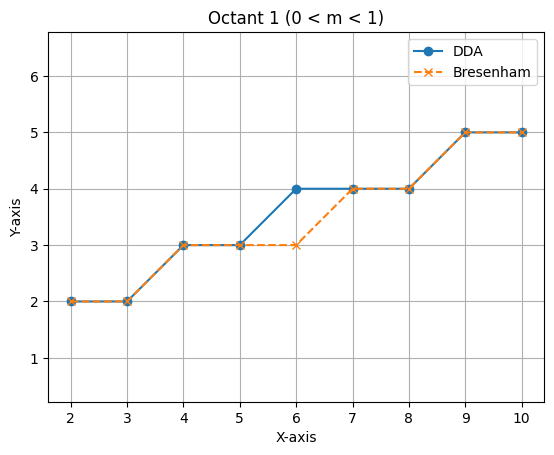

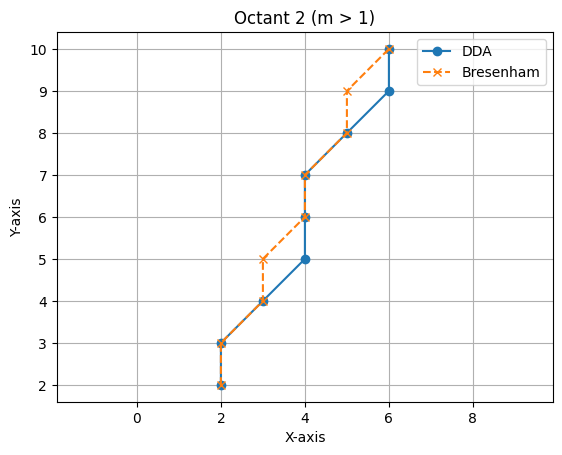

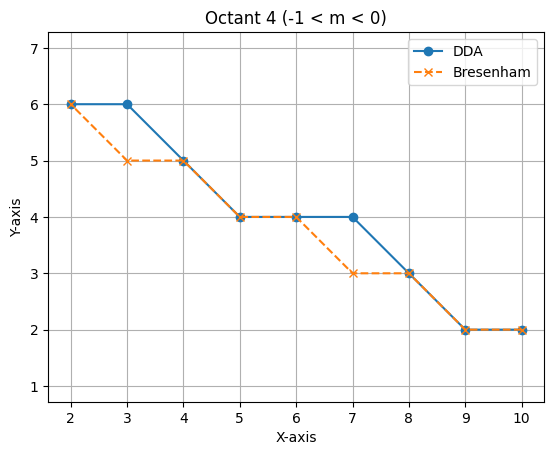

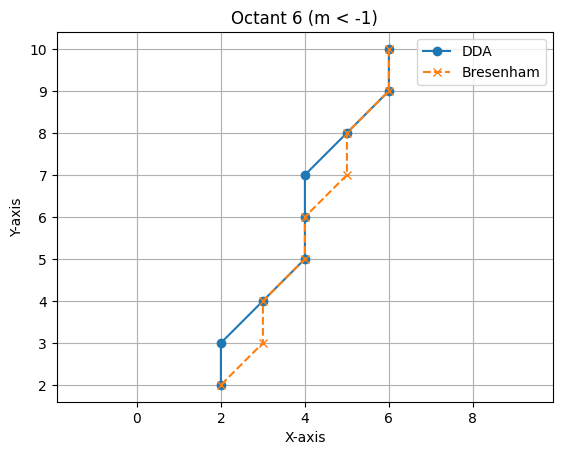

In [11]:
import matplotlib.pyplot as plt

# DDA Algorithm
def dda(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))
    x_inc = dx / steps
    y_inc = dy / steps

    x, y = x1, y1
    xs, ys = [], []

    for _ in range(int(steps) + 1):
        xs.append(round(x))
        ys.append(round(y))
        x += x_inc
        y += y_inc

    return xs, ys


# Bresenham Algorithm (All Octants)
def bresenham(x1, y1, x2, y2):
    xs, ys = [], []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy

    while True:
        xs.append(x1)
        ys.append(y1)
        if x1 == x2 and y1 == y2:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy

    return xs, ys


# Test lines from different octants
lines = [
    ((2, 2), (10, 5), "Octant 1 (0 < m < 1)"),
    ((2, 2), (6, 10), "Octant 2 (m > 1)"),
    ((10, 2), (2, 6), "Octant 4 (-1 < m < 0)"),
    ((6, 10), (2, 2), "Octant 6 (m < -1)")
]

# Plot comparison
for (x1, y1), (x2, y2), title in lines:
    x_dda, y_dda = dda(x1, y1, x2, y2)
    x_bre, y_bre = bresenham(x1, y1, x2, y2)

    plt.figure()
    plt.plot(x_dda, y_dda, marker='o', label='DDA')
    plt.plot(x_bre, y_bre, marker='x', linestyle='--', label='Bresenham')
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.axis("equal")
    plt.legend()
    plt.show()


Compare the number of integer additions and multiplications used by DDA and
Bresenham.

In [12]:
# Compare operation counts for DDA vs Bresenham

def dda_operation_count(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1

    # initial calculations
    float_mul = 2      # dx/steps, dy/steps
    float_add = 0
    int_add = 0
    int_mul = 0

    steps = max(abs(dx), abs(dy))
    float_add += 2     # x = x + x_inc, y = y + y_inc per step
    float_add *= steps

    return {
        "Integer Additions": int_add,
        "Integer Multiplications": int_mul,
        "Floating Additions": float_add,
        "Floating Multiplications": float_mul
    }


def bresenham_operation_count(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    steps = max(dx, dy)

    int_add = 2 * steps      # decision parameter updates
    int_mul = 1 * steps      # 2*dx or 2*dy
    float_add = 0
    float_mul = 0

    return {
        "Integer Additions": int_add,
        "Integer Multiplications": int_mul,
        "Floating Additions": float_add,
        "Floating Multiplications": float_mul
    }


# Example comparison
dda_ops = dda_operation_count(2, 2, 10, 5)
bres_ops = bresenham_operation_count(2, 2, 10, 5)

print("DDA Operation Count:")
for k, v in dda_ops.items():
    print(f"{k}: {v}")

print("\nBresenham Operation Count:")
for k, v in bres_ops.items():
    print(f"{k}: {v}")


DDA Operation Count:
Integer Additions: 0
Integer Multiplications: 0
Floating Additions: 16
Floating Multiplications: 2

Bresenham Operation Count:
Integer Additions: 16
Integer Multiplications: 8
Floating Additions: 0
Floating Multiplications: 0
